In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cdata = pd.read_csv('credit_record.csv')
cdata.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
adata = pd.read_csv('application_record.csv')
adata.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
#check missing value
print(cdata.isnull().sum())
print()
print(adata.isnull().sum())

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [5]:
#remove missing value
adata.fillna('Unknown', inplace=True)
print(adata.isnull().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64


In [6]:
print(cdata.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00


In [7]:
print(adata.describe())

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

                        ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
ID                1.000000     -0.005178          0.011179   -0.004994   
CNT_CHILDREN     -0.005178      1.000000          0.019177    0.349088   
AMT_INCOME_TOTAL  0.011179      0.019177          1.000000    0.053775   
DAYS_BIRTH       -0.004994      0.349088          0.053775    1.000000   
DAYS_EMPLOYED    -0.002467     -0.241535         -0.141291   -0.617908   
FLAG_MOBIL             NaN           NaN               NaN         NaN   
FLAG_WORK_PHONE  -0.023319      0.038418         -0.033635    0.171829   
FLAG_PHONE       -0.018992     -0.038266          0.004444   -0.037984   
FLAG_EMAIL        0.032875      0.028457          0.112139    0.096752   
CNT_FAM_MEMBERS  -0.001862      0.884781          0.011454    0.306179   

                  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID                    -0.002467         NaN        -0.023319   -0.018992   
CNT_CHILDREN          -0.241535  

<AxesSubplot:>

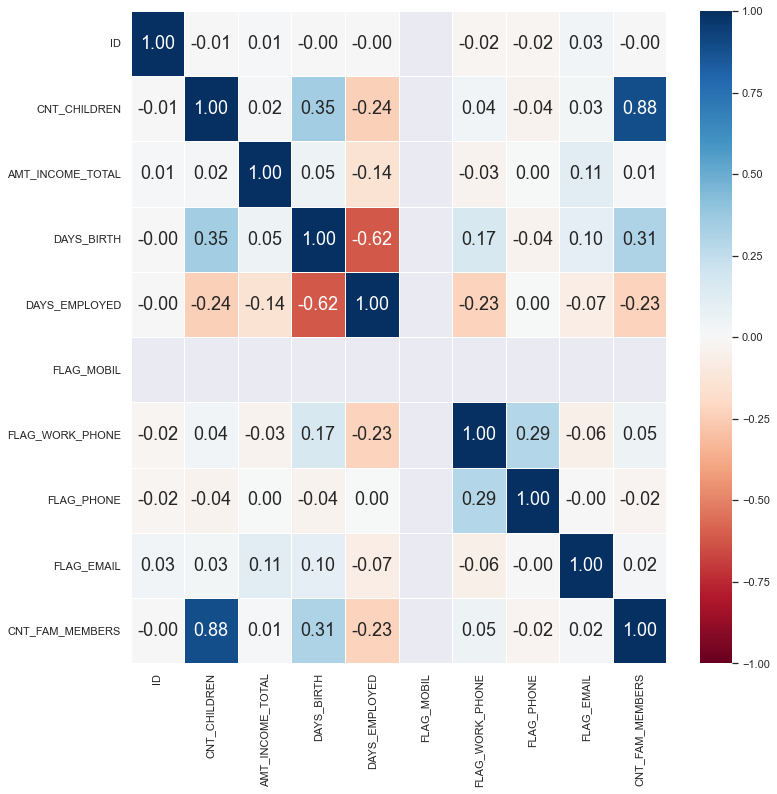

In [13]:
print(adata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(adata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [9]:
print(adata.dtypes)

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


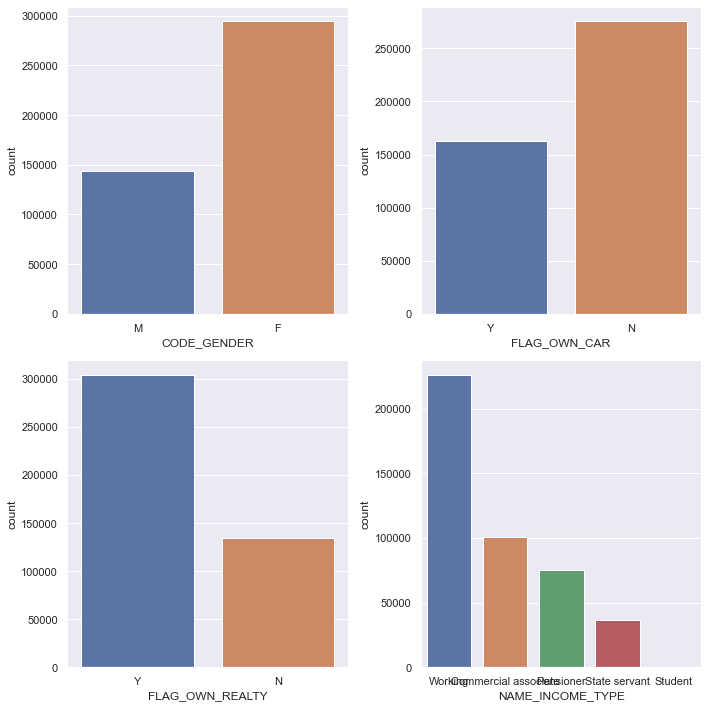

In [10]:
#count plot of categorical variavle
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sb.countplot(ax=axes[0, 0], data=adata, x='CODE_GENDER')
sb.countplot(ax=axes[0, 1], data=adata, x='FLAG_OWN_CAR')
sb.countplot(ax=axes[1, 0], data=adata, x='FLAG_OWN_REALTY')
sb.countplot(ax=axes[1, 1], data=adata, x='NAME_INCOME_TYPE')
plt.tight_layout()

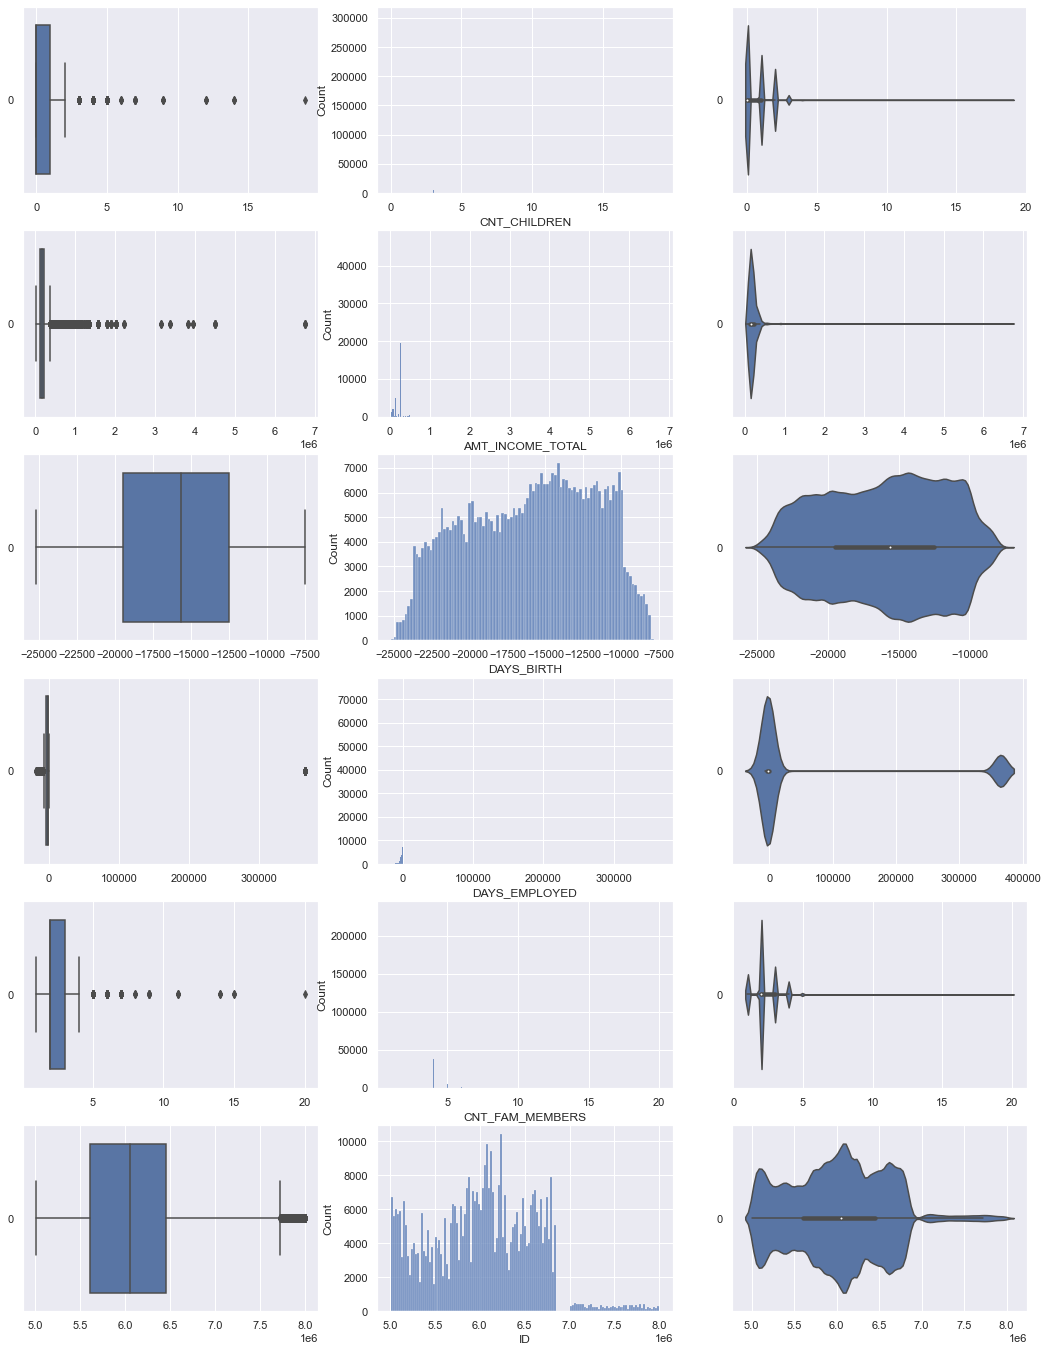

In [11]:
some_data = pd.DataFrame(adata[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "ID"]])

f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in some_data:
    sb.boxplot(data = some_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = some_data[var], ax = axes[count,1])
    sb.violinplot(data = some_data[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
pd.